In [45]:
from matplotlib import pyplot as plt
# import seaborn as sns
import pandas as pd
import re
import os

NAME="result-stability2"

RESULTDIR="/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/"+NAME



def get_diff_value(path):
    try:
        lines = open(path).readlines()
    except:
        return None
    lines = iter(lines)
    result = []
    try:
        while True:
            next(lines)
            next(lines)
            diff = next(lines)
            if not diff:
                break
            if diff=='None\n':
#                 print("None")
                continue
            diff = int(diff)
            result.append(diff)
    except:
        pass
    return result
    

    
result=[]

for root, dirs, files in os.walk(RESULTDIR):
    for name in files:
#         print(name)
        path = os.path.join(root, name)
        ns = name.split(".")
        if ns[1]=='txt':
            asn = int(ns[0])
            diff1 = get_diff_value("/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-stability1/"+name)
            diff2 = get_diff_value(path)
            diff3 = get_diff_value("/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-stability3/"+name)
            diff4 = get_diff_value("/home/pcl/8LStudentYuHaitao/tmp/sfp/code/sfp_eval/analysis/result-stability/"+name)
            if diff1 and diff2 and diff3:
                result.extend((asn, a, 1) for a in diff1)
                result.extend((asn, a, 2) for a in diff2)
                result.extend((asn, a, 3) for a in diff3)
                result.extend((asn, a, 4) for a in diff4)
            
# print(result)


31


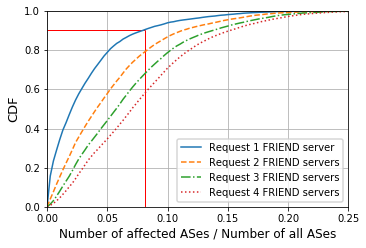

In [56]:
plt.rcParams["lines.linewidth"]=1.5
plt.rcParams["patch.linewidth"]=1.5

import numpy as np

width=5.4
height=width*4/6
fig = plt.figure(figsize=(width,height))

c0="C_AS"
c1="Diff_NUM"
c2="S_AS_NUM"
df = pd.DataFrame(result, columns=[c0,c1,c2], dtype=float)
df.to_csv("csv/stability.csv", index=False)
# df = pd.read_csv("csv/stability.csv")

style=['-','--','-.',':']

labels=[
    "Request 1 FRIEND server",
    "Request 2 FRIEND servers",
    "Request 3 FRIEND servers",
    "Request 4 FRIEND servers"
]

for s_as_num in 1,2,3,4:
    a = df[df[c2]==s_as_num][c1]/63361.0
    #a.hist(cumulative = True,density=True, histtype='step',bins=1000,label="Number of requested FRIEND servers=%d"%s_as_num, range=(0,0.26) )
    #label="Number of requested FRIEND servers=%d"%s_as_num,
    x = np.linspace(0,0.26,100)
    s = a.count()
    y = np.array([a[a<v].count()/s for v in x])
    plt.plot(x,y, linestyle=style[s_as_num-1],label=labels[s_as_num-1])
    if s_as_num==1:
        i = np.where(y>0.9)[0][0]
        print(i)
        x0=x[i]
        y0=y[i]
        plt.vlines(x0, 0,y0, color='r',linewidth=1)
        plt.hlines(y0, 0, x0, color='r',linewidth=1)

# a=-df[c1]
# a.hist(cumulative = True,density=True, histtype='step',bins=500,label="Prefix", range= (-1,0))


# a = np.around(np.linspace(1,0,6), decimals=1)

# plt.xticks(np.linspace(-1,0,6), a)
plt.xlabel("Number of affected ASes / Number of all ASes",fontsize=12)
plt.ylabel("CDF",fontsize=13)
plt.xlim([0,0.25])
plt.ylim([0,1])
plt.grid()

plt.legend(loc='lower right')

fig.savefig("result/result-stability-cdf.pdf",dpi=300, bbox_inches='tight')


In [47]:
df.count()

C_AS        74611
Diff_NUM    74611
S_AS_NUM    74611
dtype: int64